In [2]:
''' 
Link to Documentation: https://github.com/ultralytics/yolov5

RUN IN TERMINAL BEFORE PROCEEDED IN THE 'fashion-forecast' DIRECTORY:
>   pip install ultralytics
>   git clone https://github.com/ultralytics/yolov5  
>   cd yolov5
>   pip install -r requirements.txt  
>   cd ..
'''

" \nLink to Documentation: https://github.com/ultralytics/yolov5\n\nRUN IN TERMINAL BEFORE PROCEEDED IN THE 'fashion-forecast' DIRECTORY:\n>   pip install ultralytics\n>   git clone https://github.com/ultralytics/yolov5  \n>   cd yolov5\n>   pip install -r requirements.txt  \n>   cd ..\n"

In [3]:
import torch
import numpy as np
import pandas as pd
import os
from PIL import Image

%matplotlib inline 
from matplotlib import pyplot as plt

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5n', pretrained=True) #force_reload=True

Using cache found in C:\Users\cardon/.cache\torch\hub\ultralytics_yolov5_master


requirements: Ultralytics requirement ['numpy>=1.23.5'] not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)


YOLOv5  2024-2-16 Python-3.8.5 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 


In [5]:
'''
CODE TO CHANGE DEVICE:
model.cpu()  # CPU
model.cuda()  # GPU
model.to(device)  # i.e. device=torch.device(0)
'''

'\nCODE TO CHANGE DEVICE:\nmodel.cpu()  # CPU\nmodel.cuda()  # GPU\nmodel.to(device)  # i.e. device=torch.device(0)\n'

In [12]:
img_list = []
img_names = []
directory = 'C:/Users/cardon/OneDrive - Rensselaer Polytechnic Institute/SEM8/RCOS/unpack-data'
trial_size = 10
counter = 0
for img_name in os.listdir(directory):
    img_path = os.path.join(directory, img_name)
    if counter == trial_size:
        break
    pil_img = Image.open(img_path)
    np_img = np.array(pil_img)
    #plt.imshow(np_img)             # used to display the images
    #plt.show()
    img_list.append(np_img)
    img_names.append(str(img_path))
    counter += 1

Saved 10 images to runs\detect\exp2


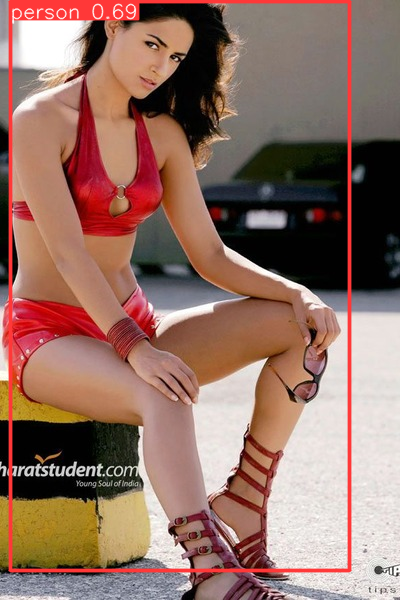

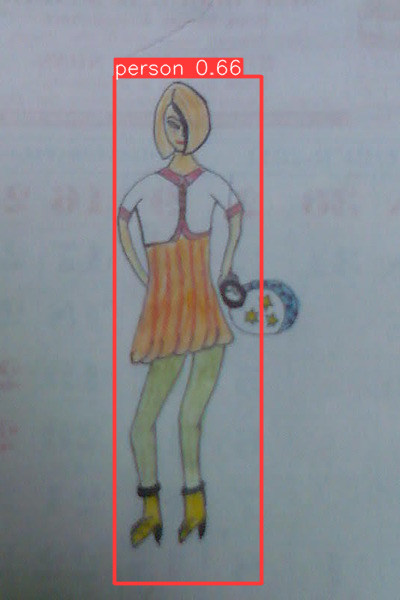

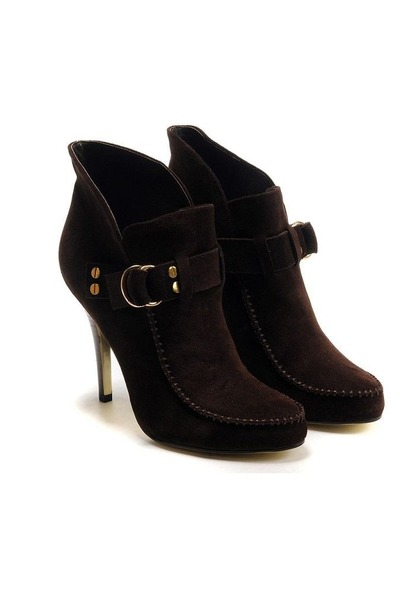

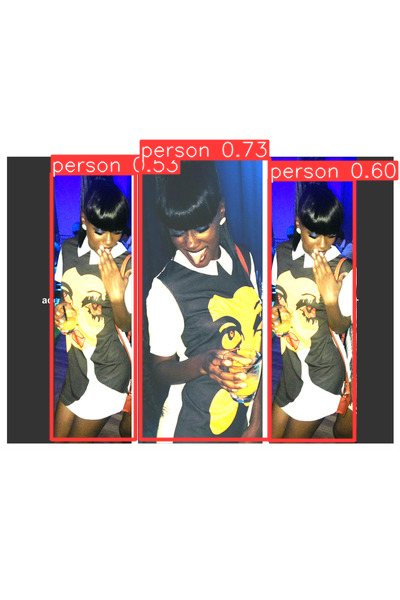

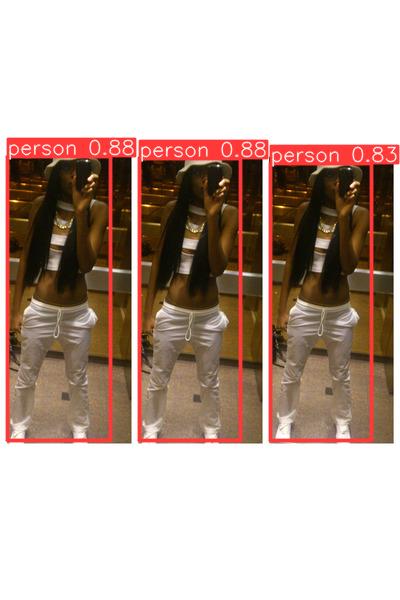

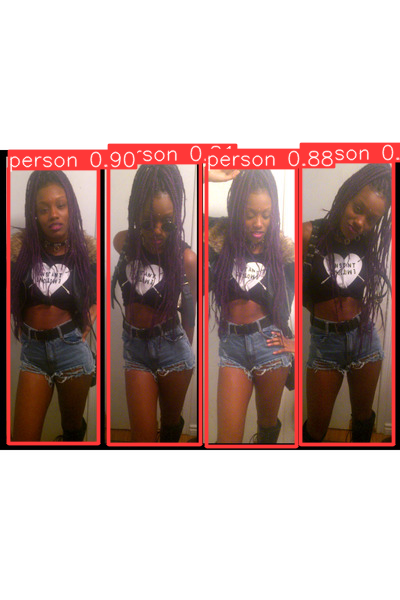

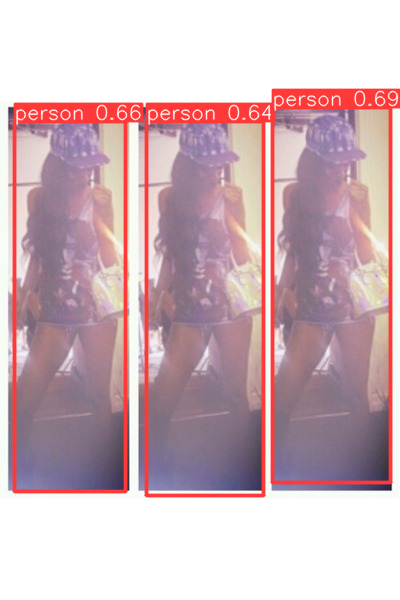

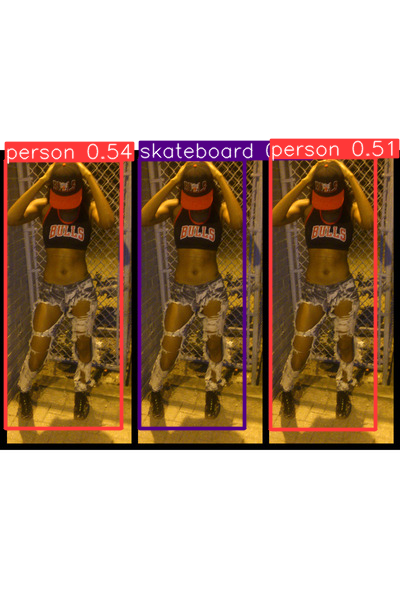

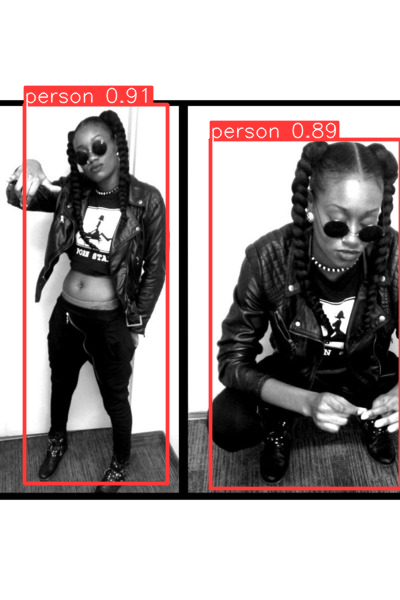

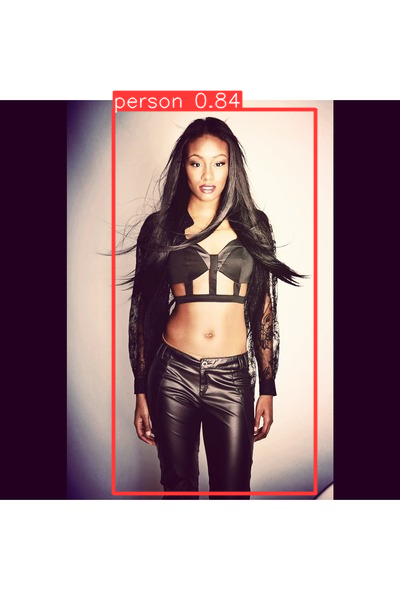

In [7]:
results = model(img_list)  # inference
results.save()   # cropped detections dictionary
results.show()

In [13]:
detection_df = results.pandas().xyxy
print(len(detection_df))

10


In [39]:
"""Takes the current results and saves only the information from the maximum 'person' detections"""

cleaned_df_lst = []
for idx, df in enumerate(detection_df):
    if df.empty == True:
        img_names.pop(idx)
        continue
    if (len(df.index) == 1) and (df.loc[0]['name'] == 'person'):
        row = df.iloc[0].tolist()
        cleaned_df_lst.append(row)
        continue
    # multiple detections -> choose the highest confidence of person
    person_df = df[df['name']=='person']
    if person_df.empty == True:
        img_names.pop(idx)
        continue
    maxValueIndex = person_df['confidence'].idxmax()
    row = df.iloc[maxValueIndex].tolist()
    cleaned_df_lst.append(row)

precleaned_df = pd.DataFrame(cleaned_df_lst, columns = list(detection_df[0].columns))
name_df = pd.DataFrame(img_names, columns = ['img_name'])
cleaned_df = pd.concat([precleaned_df, name_df], axis=1, )
#print(len(cleaned_df.index))
print(cleaned_df)


         xmin        ymin        xmax        ymax  confidence  class    name  \
0   10.151843    1.122065  349.893433  570.547913    0.687423      0  person   
1  114.608360   76.524460  261.235443  583.553833    0.658513      0  person   
2  140.355148  158.736282  269.209686  439.284821    0.730129      0  person   
3  139.773468  158.520401  240.248520  440.595734    0.883885      0  person   
4    8.360785  168.186981   98.627975  443.814850    0.897566      0  person   
5  272.888763  107.303551  390.621063  482.652039    0.690899      0  person   
6    5.260978  160.594330  121.041145  428.059631    0.540606      0  person   
7   24.030506  104.906326  167.325546  483.383881    0.911007      0  person   
8  113.471832  109.104477  315.365082  493.591492    0.837137      0  person   

                                            img_name  
0  C:/Users/cardon/OneDrive - Rensselaer Polytech...  
1  C:/Users/cardon/OneDrive - Rensselaer Polytech...  
2  C:/Users/cardon/OneDrive - Rens

In [45]:
"""Takes the cleaned df data and crops each image to it's detected bounding box dimensions"""
directory = 'C:/Users/cardon/OneDrive - Rensselaer Polytechnic Institute/SEM8/RCOS/unpack-data'
save_dir = 'C:/Users/cardon/OneDrive - Rensselaer Polytechnic Institute/SEM8/RCOS/crop-data'
df_index = 0
for idx, img_name in enumerate(os.listdir(directory)):
    if idx == 8:
        break
    img_path = os.path.join(directory, img_name)
    #print(img_path)
    xmin, ymin, xmax, ymax, df_imgpath = cleaned_df.loc[df_index][['xmin', 'ymin', 'xmax', 'ymax', 'img_name']]
    #print(int(xmin), int(ymin), int(xmax), int(ymax))
    if img_path != df_imgpath:
        continue
    df_index += 1
    pil_img = Image.open(img_path)
    np_img = np.array(pil_img)
    #plt.imshow(np_img)             
    #plt.show()
    crop_img = np_img[int(ymin):int(ymax), int(xmin):int(xmax)]
    #plt.imshow(crop_img)             
    #plt.show()
    save_path = os.path.join(save_dir, (img_name+'.jpg'))
    save_im = Image.fromarray(crop_img)
    save_im.save(save_path)
    